## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv(r"../Day073-erf/002 QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


## **Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


## **Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(1991, 3)

## **Challenge**: Count the number of entries in each column of the dataframe

In [6]:
len(df)

1991

In [7]:
df.groupby('TAG').value_counts()

TAG       DATE                 POSTS
assembly  2008-08-01 00:00:00  8        1
          2008-09-01 00:00:00  28       1
          2008-10-01 00:00:00  15       1
          2008-11-01 00:00:00  17       1
          2008-12-01 00:00:00  18       1
                                       ..
swift     2020-03-01 00:00:00  3434     1
          2020-04-01 00:00:00  4015     1
          2020-05-01 00:00:00  4066     1
          2020-06-01 00:00:00  3733     1
          2020-07-01 00:00:00  3607     1
Name: count, Length: 1991, dtype: int64

## **Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [77]:
# all_languages = df['TAG'].drop_duplicates()[1:].to_list()
# meta_df = pd.DataFrame(
#     data= {lang: df[df['TAG'] == lang]['POSTS'].sum() for lang in all_languages}.values(),
#     index= all_languages,
#     columns=['ALL TIME POSTS NUMBER']
# ).sort_values('ALL TIME POSTS NUMBER', ascending=False)
# meta_df
df.groupby("TAG").sum()[['POSTS']].sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


In [75]:
df.groupby("TAG").sum()[['POSTS']].sort_values('POSTS', ascending=False).head(1)

,POSTS
TAG,
javascript,2056510


In [76]:
df.groupby("TAG").sum()[['POSTS']].sort_values('POSTS', ascending=False).tail(1)

,POSTS
TAG,
assembly,34852


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

## **Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [61]:
# month_df = pd.DataFrame(
#     data= {lang: df[df['TAG'] == lang]['DATE'].drop_duplicates().count() for lang in all_languages}.values(),
#     index= all_languages,
#     columns=['HOW MANY MONTHS']
# ).sort_values('HOW MANY MONTHS')
# month_df
df.groupby("TAG").size().to_frame("Month").sort_values('Month')

,Month
TAG,
go,129
swift,135
r,142
assembly,144
java,144
delphi,144
c++,144
c,144
python,144


In [59]:
# month_df[month_df['HOW MANY MONTHS'] == month_df['HOW MANY MONTHS'].min()]
df.groupby("TAG").size().sort_values().head(1).to_frame("Lowest Month Number")

,Lowest Month Number
TAG,
go,129


In [60]:
df.groupby("TAG").size().sort_values().tail(1).to_frame("Biggest Month Number")

,Biggest Month Number
TAG,
c#,145


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [112]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.date
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


-------
# Testing `pd.DataFrame().Pivot()`


In [101]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [102]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


-------------

## Data Manipulation
### use `pd.DataFrame().pivot()` on our `df` to reshape it.


In [ ]:
reshaped_df = df.pivot(
    index= 'DATE',
    columns= 'TAG', 
    values= 'POSTS',
)
reshaped_df

### after pivot, we have some `NaN` values, we could use `pd.DataFrame().fillna()` to fill it with what we want.

In [ ]:
reshaped_df
reshaped_df.fillna(0, inplace=True)

### to check for if is there any missing values anymore, we could use `pd.DataFrame().isna()` which fill a DataFrame for us wiht boolean values, also we could use `reshaped_df.isna().values.any()` instead to insure about all of DataFrame for missing values. 

In [123]:
reshaped_df.isna().values.any()

np.False_

-----------


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

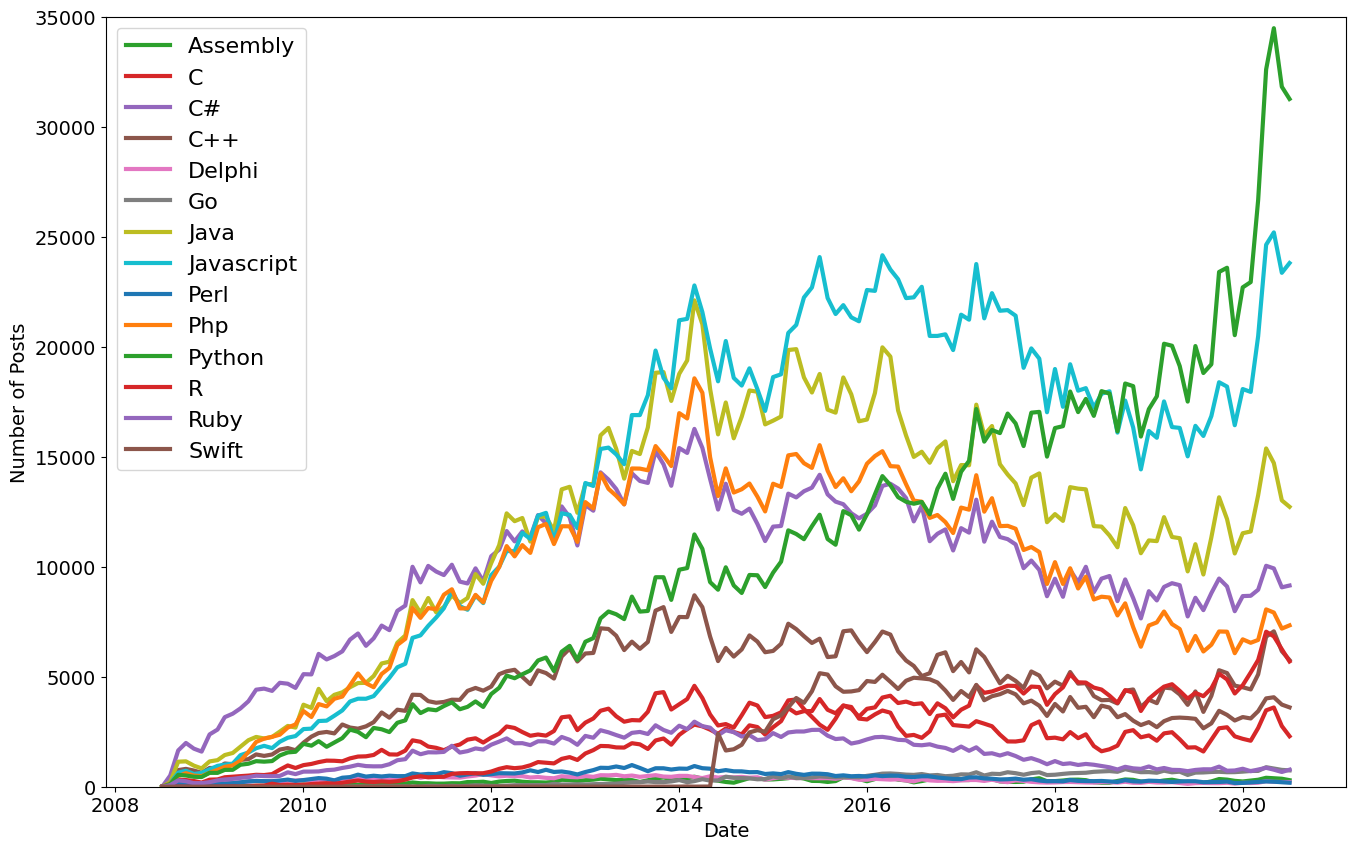

In [153]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylim(0, 35000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize= 14)
# plt.xlim(2018,2020)
plt.plot(
    reshaped_df.index,
    reshaped_df[['java', 'python']],
    data= reshaped_df[['java', 'python']],
)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name.title())

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 